In [ ]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DA_G9/cleaned_and_encoded_dataset2.csv')
data.head()

,customer_id,bad_flag,loan_amt_requested,mort_due,current_property_value,years_on_job,no_of_derog,no_of_delinq,age_of_oldest_cl,no_of_recent_credit_inquiries,...,loan_reason_homeImp,job_mgr,job_office,job_profExe,job_sales,job_self,income_group_high,income_group_lowMed,job_other_nonProvided,loan_reason_debtCon_np
0,CUST0001,1,1100,25860.0,39025.0,10.5,0,0,94.366667,1,...,1,0,0,0,0,0,0,1,1,0
1,CUST0002,1,1300,70053.0,68400.0,7.0,0,2,121.833333,0,...,1,0,0,0,0,0,1,0,1,0
2,CUST0003,1,1500,13500.0,16700.0,4.0,0,0,149.466667,1,...,1,0,0,0,0,0,0,1,1,0
3,CUST0004,0,1700,97800.0,112000.0,3.0,0,0,93.333333,0,...,1,0,1,0,0,0,1,0,0,0
4,CUST0005,1,1700,30548.0,40320.0,9.0,0,0,101.466002,1,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
df_encoded = data.iloc[:,1:]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bad_flag                       5796 non-null   int64  
 1   loan_amt_requested             5796 non-null   int64  
 2   mort_due                       5796 non-null   float64
 3   current_property_value         5796 non-null   float64
 4   years_on_job                   5796 non-null   float64
 5   no_of_derog                    5796 non-null   int64  
 6   no_of_delinq                   5796 non-null   int64  
 7   age_of_oldest_cl               5796 non-null   float64
 8   no_of_recent_credit_inquiries  5796 non-null   int64  
 9   no_of_cl                       5796 non-null   int64  
 10  debt_to_income_ratio           5796 non-null   float64
 11  cl_delinquency_ratio           5796 non-null   float64
 12  approx_income                  5796 non-null   f

In [ ]:
# Assuming your dataset is loaded into a DataFrame 'df'
x = df_encoded.drop('bad_flag', axis=1)  # Features (all columns except 'BAD')
y = df_encoded['bad_flag']               # Target variable

# Split the data into training and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
x_train_resampled = pd.read_csv('/content/drive/MyDrive/DA_G9/x_train_smote2.csv')
x_test = pd.read_csv('/content/drive/MyDrive/DA_G9/x_test_smote2.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/DA_G9/y_train_smote2.csv')
y_test = pd.read_csv('/content/drive/MyDrive/DA_G9/y_test_smote2.csv')

# Fit model by using x_train_resampled & y_train_resampled

In [ ]:

from xgboost import XGBClassifier

# Display model performance
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
# model = XGBClassifier(scale_pos_weight=1)  # With balanced classes, scale_pos_weight can be set to 1
model = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='auc', objective='binary:logistic')
# Train the model
model.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Display model performance
# from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, average_precision_score, make_scorer, recall_score,)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]
y_pred_train = model.predict(x_train_resampled)
print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train_resampled, y_pred_train))
print("Classification Report:\n", classification_report(y_test, y_pred, digits = 3))

print("ROC‑AUC :", roc_auc_score(y_test, y_pred).round(3))
print("PR‑AUC  :", average_precision_score(y_test, y_prob).round(3))

cm_xgb = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_xgb.ravel()
print(f"Recall (bad)         : {tp / (tp + fn):.3f}")
print(f"Specificity (good)   : {tn / (tn + fp):.3f}")
print(f"tn, fp, fn, tp   : {tn:.0f}, {fp:.0f}, {fn:.0f}, {tp:.0f}")

Accuracy test: 0.9301724137931034
Accuracy train: 0.9997314715359829
Classification Report:
               precision    recall  f1-score   support

           0      0.950     0.964     0.957       932
           1      0.842     0.794     0.817       228

    accuracy                          0.930      1160
   macro avg      0.896     0.879     0.887      1160
weighted avg      0.929     0.930     0.929      1160

ROC‑AUC : 0.879
PR‑AUC  : 0.913
Recall (bad)         : 0.794
Specificity (good)   : 0.964
tn, fp, fn, tp   : 898, 34, 47, 181


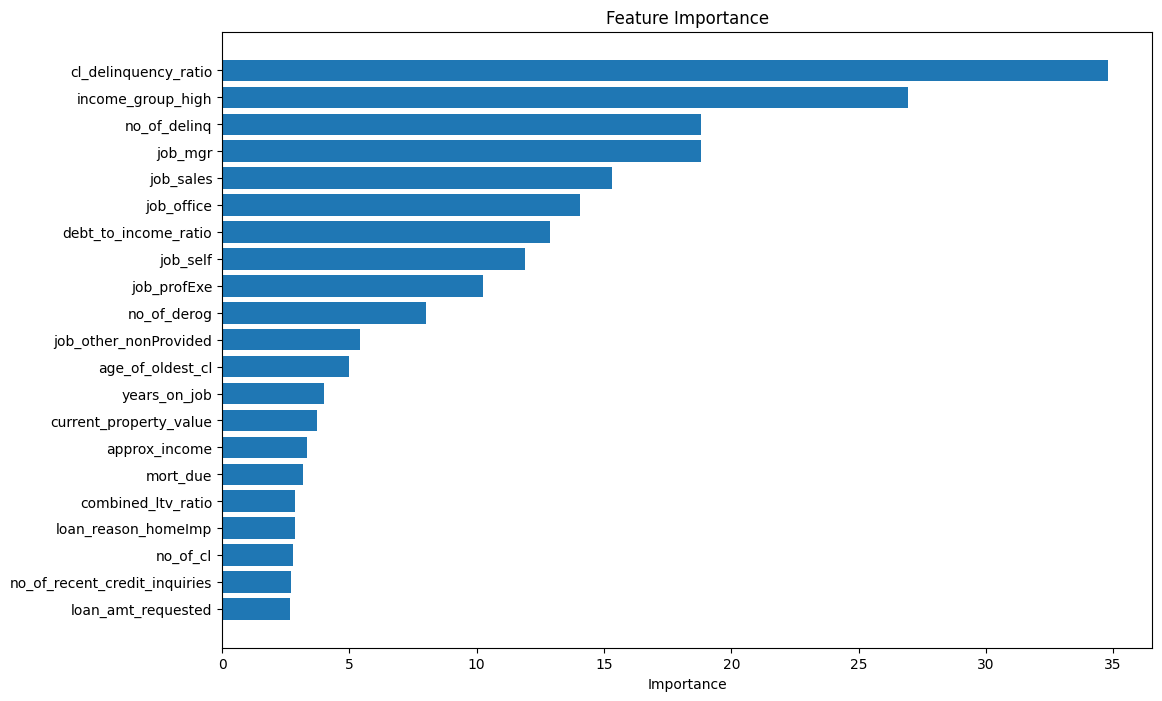

In [ ]:

# Assume xgb_model is your trained XGBoost model
# Get feature importance
feature_importance = model.get_booster().get_score(importance_type='gain')

# Sort features according to importance
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Prepare to plot
features, importance = zip(*sorted_importance)

plt.figure(figsize=(12, 8))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()

Randomised Search CV

In [ ]:
# param_dist =

  #{'subsample': [0.7], 'n_estimators': [200], 'min_child_weight': [2], 'max_depth': [9], 'learning_rate': [0.2], 'lambda': [1.5], 'gamma': [0.0], 'colsample_bytree': [0.5], 'alpha': [0.2]}

param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], #Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
    'min_child_weight': [1, 2, 3, 4], # The larger min_child_weight is, the more conservative the algorithm will be.
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],  #Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9], #is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed
    'lambda': [1, 1.5, 2], #L2 regularization term on weights. Increasing this value will make model more conservative.
    'alpha': [0, 0.1, 0.2, 0.3], #L1 regularization term on weights. Increasing this value will make model more conservative.
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
   #'scale_pos_weight': [1, 2, 3, 4]  # Depending on the class imbalance
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, make_scorer


In [ ]:
# Initialize the XGBClassifier
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#objective = binary:logistic, binary:hinge
#eval_metric = logloss, auc (objective logistic)

from sklearn.model_selection import RandomizedSearchCV
# recall for bad customers (label 1) ─ this is already the default
recall_bad = make_scorer(recall_score, pos_label=1)

# specificity (true‑negative rate for good customers)
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)
specificity_good = make_scorer(specificity, greater_is_better=True)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, scoring= 'accuracy'
#  {

#         "recall_bad": recall_bad,
#         "specificity_good": specificity_good,
#     }
    # , refit = 'recall_bad'
    , n_jobs=-1, cv=cv, verbose=2, random_state=42)


In [ ]:
# Assuming X_train and y_train are already defined
random_search.fit(x_train_resampled, y_train_resampled)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importa...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.2, 0.3],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'lambda': [1, 1.5, 2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Assuming y_pred and y_test are already defined
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)


In [ ]:
print("Best parameters found: ", random_search.best_params_)
random_model = random_search.best_estimator_

y_pred = random_model.predict(x_test)
y_prob = random_model.predict_proba(x_test)[:, 1]
y_pred_train = random_model.predict(x_train_resampled)

print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train_resampled, y_pred_train))
print("Classification Report:\n", classification_report(y_test, y_pred, digits = 3))

print("ROC‑AUC :", roc_auc_score(y_test, y_pred).round(3))
print("PR‑AUC  :", average_precision_score(y_test, y_prob).round(3))

cm_xgb = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_xgb.ravel()
print(f"Recall (bad)         : {tp / (tp + fn):.3f}")
print(f"Specificity (good)   : {tn / (tn + fp):.3f}")
print(f"tn, fp, fn, tp   : {tn:.0f}, {fp:.0f}, {fn:.0f}, {tp:.0f}")

Best parameters found:  {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.2, 'lambda': 1.5, 'gamma': 0.0, 'colsample_bytree': 0.5, 'alpha': 0.2}
Accuracy test: 0.9387931034482758
Accuracy train: 1.0
Classification Report:
               precision    recall  f1-score   support

           0      0.956     0.969     0.962       932
           1      0.865     0.816     0.840       228

    accuracy                          0.939      1160
   macro avg      0.910     0.892     0.901      1160
weighted avg      0.938     0.939     0.938      1160

ROC‑AUC : 0.892
PR‑AUC  : 0.923
Recall (bad)         : 0.816
Specificity (good)   : 0.969
tn, fp, fn, tp   : 903, 29, 42, 186


GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'colsample_bytree': [0.7], 'gamma': [0.0], 'learning_rate': [0.2], 'max_depth': [9], 'min_child_weight': [1], 'n_estimators': [400], 'reg_alpha': [0.1], 'reg_lambda': [1.5], 'subsample': [0.8]}

#   {
#     'n_estimators': [200, 300, 400],               # more trees to fit subtle patterns
#     'learning_rate': [0.1, 0.15, 0.2],             # lower rates improve generalization
#     'max_depth': [7, 9],                           # keep or slightly reduce complexity
#     'min_child_weight': [1, 2],                    # 1 might improve sensitivity
#     'gamma': [0.0, 0.1, 0.2],                      # test light regularization
#     'subsample': [0.7, 0.8],                       # slightly increase randomness
#     'colsample_bytree': [0.5, 0.7],                # allow more feature variation
#     'reg_alpha': [0.1, 0.2],                       # mild sparsity
#     'reg_lambda': [1.0, 1.5, 2.0]                  # control L2 regularization
# }


# Setup GridSearchCV to focus on improving recall
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring= {
        "recall_bad": recall_bad,
        "specificity_good": specificity_good,
    }, refit = 'recall_bad', cv=cv, verbose=2, n_jobs=-1)



# Assuming X_train and y_train are your training datasets
grid_search.fit(x_train_resampled, y_train_resampled)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_ty...
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.0],
                         'learning_rate': [0.2], 'max_depth': [9],
                         'min_child_weight': [1], 'n_estimators': [400],
                         'reg_alpha': [0.1], 'reg_lambda': [1.5],
                         'subsample': [0.8]},
             refit='recall_bad',
             scoring={'recall_bad': make_scorer(recall_score, response_method='predict', pos_label=1),
                      'specificity_good': make_scorer(specificity, response_method='predict')},
             verbose=2)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
Best recall score:  0.956231868369777


In [ ]:
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]
y_pred_train = best_model.predict(x_train_resampled)

print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train_resampled, y_pred_train))
print("Classification Report:\n", classification_report(y_test, y_pred, digits = 3))

print("ROC‑AUC :", roc_auc_score(y_test, y_pred).round(3))
print("PR‑AUC  :", average_precision_score(y_test, y_prob).round(3))

cm_xgb = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_xgb.ravel()
print(f"Recall (bad)         : {tp / (tp + fn):.3f}")
print(f"Specificity (good)   : {tn / (tn + fp):.3f}")
print(f"tn, fp, fn, tp   : {tn:.0f}, {fp:.0f}, {fn:.0f}, {tp:.0f}")


Accuracy test: 0.9431034482758621
Accuracy train: 1.0
Classification Report:
               precision    recall  f1-score   support

           0      0.955     0.975     0.965       932
           1      0.889     0.811     0.849       228

    accuracy                          0.943      1160
   macro avg      0.922     0.893     0.907      1160
weighted avg      0.942     0.943     0.942      1160

ROC‑AUC : 0.893
PR‑AUC  : 0.933
Recall (bad)         : 0.811
Specificity (good)   : 0.975
tn, fp, fn, tp   : 909, 23, 43, 185


Reduce Overfitting

In [ ]:
#Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 9
#, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}

In [ ]:
param_grid = {'colsample_bytree': [0.7], 'gamma': [0.2], 'learning_rate': [0.1], 'max_depth': [6], 'min_child_weight': [3], 'n_estimators': [500], 'reg_alpha': [0.3], 'reg_lambda': [2.0], 'subsample': [0.8]}

#   {
#     'max_depth': [5, 6],
#     'min_child_weight': [3, 5],
#     'learning_rate': [0.05, 0.1],
#     'n_estimators': [400, 500],
#     'reg_alpha': [0.3, 0.5],
#     'reg_lambda': [2.0, 3.0],
#     'gamma': [0.1, 0.2],
#     'colsample_bytree': [0.7],    # keep fixed if it works well
#     'subsample': [0.8]            # keep fixed too
# }

In [ ]:

# Setup GridSearchCV to focus on improving recall
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring= {
        "recall_bad": recall_bad,
        "specificity_good": specificity_good,
    }, refit = 'recall_bad', cv=cv, verbose=2, n_jobs=-1)

# Assuming X_train and y_train are your training datasets
grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_ty...
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.2],
                         'learning_rate': [0.1], 'max_depth': [6],
                         'min_child_weight': [3], 'n_estimators': [500],
                         'reg_alpha': [0.3], 'reg_lambda': [2.0],
                         'subsample': [0.8]},
             refit='recall_bad',
             scoring={'recall_bad': make_scorer(recall_score, response_method='predict', pos_label=1),
                      'specificity_good': make_scorer(specificity, response_method='predict')},
             verbose=2)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 500, 'reg_alpha': 0.3, 'reg_lambda': 2.0, 'subsample': 0.8}
Best recall score:  0.9468315652738688


In [ ]:
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]
y_pred_train = best_model.predict(x_train_resampled)

print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train_resampled, y_pred_train))
print("Classification Report:\n", classification_report(y_test, y_pred, digits = 3))

print("ROC‑AUC :", roc_auc_score(y_test, y_pred).round(3))
print("PR‑AUC  :", average_precision_score(y_test, y_prob).round(3))

cm_xgb = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_xgb.ravel()
print(f"Recall (bad)         : {tp / (tp + fn):.3f}")
print(f"Specificity (good)   : {tn / (tn + fp):.3f}")
print(f"tn, fp, fn, tp   : {tn:.0f}, {fp:.0f}, {fn:.0f}, {tp:.0f}")

Accuracy test: 0.9318965517241379
Accuracy train: 0.9995972073039742
Classification Report:
               precision    recall  f1-score   support

           0      0.949     0.967     0.958       932
           1      0.853     0.789     0.820       228

    accuracy                          0.932      1160
   macro avg      0.901     0.878     0.889      1160
weighted avg      0.930     0.932     0.931      1160

ROC‑AUC : 0.878
PR‑AUC  : 0.914
Recall (bad)         : 0.789
Specificity (good)   : 0.967
tn, fp, fn, tp   : 901, 31, 48, 180


Threshold Adjustment

In [ ]:

y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]

#  Threshold optimisation under recall + specificity constraints
thresholds = np.arange(0.01, 1.0, 0.01)
results_opt = []
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    if recall >= 0.85 and specificity >= 0.70:
        results_opt.append({
            'threshold': t,
            'recall': recall,
            'specificity': specificity,
            'false_negatives': fn,
            'false_positives': fp
        })
opt_df = pd.DataFrame(results_opt)
if not opt_df.empty:
    # Choose threshold with fewest false negatives (or change to lowest total errors, highest precision, etc.)
    best_threshold = opt_df.sort_values(by='false_negatives').iloc[0]['threshold']
    print(f"\nBest threshold under constraints: {best_threshold:.2f}")
    print(opt_df.sort_values(by='false_negatives').head())
else:
    print("No threshold satisfies both recall ≥ 85% and specificity ≥ 70%.")
y_pred_thresh = (y_prob >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_thresh)
print("\nConfusion matrix (custom threshold):\n", cm)
print(classification_report(y_test, y_pred_thresh, digits=3))


Best threshold under constraints: 0.03
   threshold    recall  specificity  false_negatives  false_positives
0       0.03  0.973684     0.706009                6              274
1       0.04  0.969298     0.753219                7              230
2       0.05  0.964912     0.784335                8              201
3       0.06  0.956140     0.813305               10              174
4       0.07  0.947368     0.831545               12              157

Confusion matrix (custom threshold):
 [[658 274]
 [  6 222]]
              precision    recall  f1-score   support

           0      0.991     0.706     0.825       932
           1      0.448     0.974     0.613       228

    accuracy                          0.759      1160
   macro avg      0.719     0.840     0.719      1160
weighted avg      0.884     0.759     0.783      1160

